In [1]:
import sys
sys.path.append('..')

In [2]:
import json

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from datasets.mnist import MNIST
from mnist_style import StyleMNIST

In [5]:
with open('../ckpt/mnist_style/settings.json') as f:
    settings = json.load(f)

In [6]:
mnist = MNIST()
alae = StyleMNIST(settings)

In [7]:
ckpt = tf.train.latest_checkpoint('../ckpt/mnist_style')
alae.load_ckpt(ckpt)

In [8]:
x_train, y_train = mnist.rawdata()
x_test, y_test = mnist.rawdata(train=False)

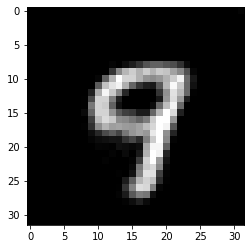

In [9]:
idx = 12
_, image = alae(x_test[idx:idx + 1])
plt.imshow(image.numpy()[0, ..., 0], cmap='gray')

In [10]:
idxA, idxB = 30, 12
latentA = alae.encode(x_test[idxA:idxA + 1])
latentB = alae.encode(x_test[idxB:idxB + 1])

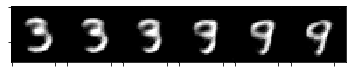

In [11]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA
for i in range(num + 1):
    image = alae.generate(latent).numpy()[0, ..., 0]
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(image, cmap='gray')
    latent += delta

fig.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

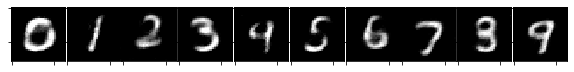

In [12]:
cherrypicked = [3, 2, 47, 30, 19, 23, 91, 0, 177, 12]
fig = plt.figure(figsize=(10, 1))
axs = [fig.add_subplot(1, 10, i + 1) for i in range(10)]

for i in range(10):
    ax = axs[i]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    
    idx = cherrypicked[i]
    _, image = alae(x_test[idx:idx + 1])
    ax.imshow(image.numpy()[0, ..., 0], cmap='gray')

fig.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('enum', bbox_inches='tight', pad_inches=0)

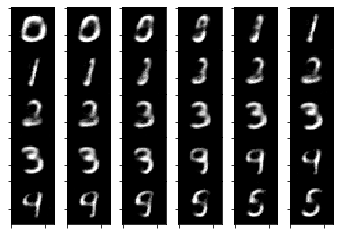

In [13]:
num = 5
fig, axs = plt.subplots(5, num + 1)

for j, (a, b) in enumerate(zip(cherrypicked[:5], cherrypicked[1:6])):
    latentA = alae.encode(x_test[a:a + 1])
    latentB = alae.encode(x_test[b:b + 1])

    delta = (latentB - latentA) / num

    latent = latentA
    for i in range(num + 1):
        image = alae.generate(latent).numpy()[0, ..., 0]
        plt.setp(axs[j, i].get_xticklabels(), visible=False)
        plt.setp(axs[j, i].get_yticklabels(), visible=False)
        axs[j, i].imshow(image, cmap='gray')
        latent += delta

fig.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('zero2four', bbox_inches='tight', pad_inches=0)